In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from TargetDistributions.DoubleWell import DoubleWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils.plotting_utils import plot_distribution
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
torch.set_default_dtype(torch.float64)

In [4]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

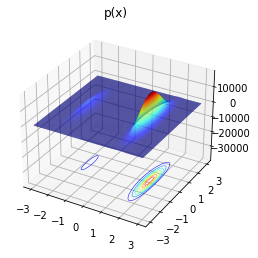

In [5]:
target = DoubleWellEnergy(2, a=-0.5, b=-6)
dist = plot_distribution(target, bounds=[[-3, 3], [-3, 3]], n_points=300)
plt.show()

# Alpha=2

In [6]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-3
optimizer = "Adam"
loss_type = "DReG"  # "kl"  #
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10

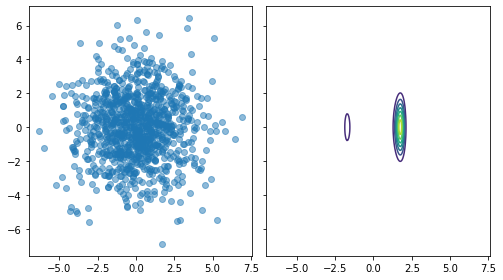

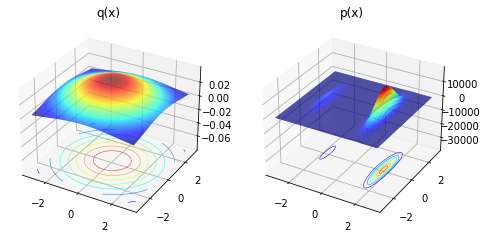

loss: -12.25830942673035, mean log p_x -28.0362391460639:   0%|          | 0/20000 [00:00<?, ?it/s]

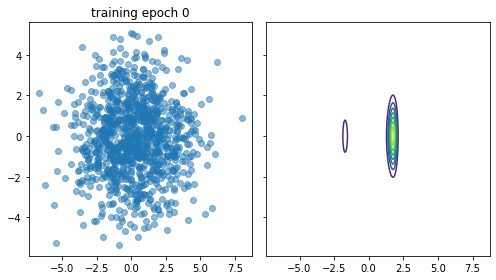

loss: -10.311538452872815, mean log p_x 8.432611799043626:  10%|█         | 2000/20000 [03:41<31:41,  9.47it/s]

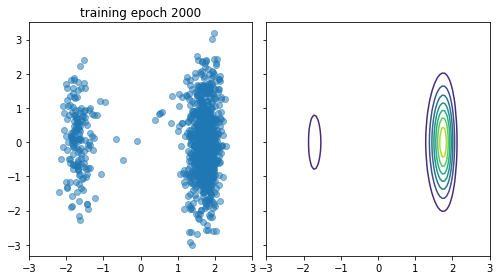

loss: -10.311538452872815, mean log p_x 8.432611799043626:  10%|█         | 2002/20000 [03:41<1:03:31,  4.72it/s]

ESS is 0.7653466944287147


loss: -10.309859476891123, mean log p_x 8.467191467159362:  11%|█▏        | 2254/20000 [04:09<35:59,  8.22it/s]  

Nan/Inf loss encountered


loss: -10.29871667052753, mean log p_x 8.467386269442457:  12%|█▏        | 2309/20000 [04:16<28:29, 10.35it/s] 

Nan/Inf loss encountered


loss: -10.319819185875529, mean log p_x 8.537159033212166:  13%|█▎        | 2532/20000 [04:39<28:05, 10.36it/s]

Nan/Inf loss encountered


loss: -10.319819185875529, mean log p_x 8.537159033212166:  13%|█▎        | 2572/20000 [04:44<27:51, 10.43it/s]

Nan/Inf loss encountered


loss: -10.299648086862131, mean log p_x 8.425796436573757:  13%|█▎        | 2636/20000 [04:50<27:44, 10.43it/s]

Nan/Inf loss encountered


loss: -10.299648086862131, mean log p_x 8.425796436573757:  13%|█▎        | 2672/20000 [04:54<28:23, 10.17it/s]

Nan/Inf loss encountered


loss: -10.299648086862131, mean log p_x 8.425796436573757:  13%|█▎        | 2692/20000 [04:57<28:20, 10.18it/s]

Nan/Inf loss encountered


loss: -10.298375863063246, mean log p_x 8.436060905023096:  14%|█▍        | 2765/20000 [05:04<30:33,  9.40it/s]

Nan/Inf loss encountered


loss: -10.298375863063246, mean log p_x 8.436060905023096:  14%|█▍        | 2784/20000 [05:06<28:11, 10.18it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  14%|█▍        | 2801/20000 [05:08<35:00,  8.19it/s]                              

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  14%|█▍        | 2875/20000 [05:16<27:38, 10.32it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  14%|█▍        | 2880/20000 [05:17<26:57, 10.58it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  14%|█▍        | 2898/20000 [05:19<26:57, 10.57it/s]

Nan/Inf loss encountered


loss: -10.31212923662672, mean log p_x 8.504158505029984:  15%|█▍        | 2964/20000 [05:26<27:40, 10.26it/s]

Nan/Inf loss encountered


loss: -10.31212923662672, mean log p_x 8.504158505029984:  15%|█▍        | 2982/20000 [05:28<27:22, 10.36it/s]

Nan/Inf loss encountered


loss: -10.292114340568084, mean log p_x 8.56236401850707:  15%|█▌        | 3043/20000 [05:35<27:26, 10.30it/s]

Nan/Inf loss encountered


loss: -10.298947961739806, mean log p_x 8.53734312785414:  16%|█▌        | 3118/20000 [05:42<26:48, 10.50it/s]

Nan/Inf loss encountered


loss: -10.298947961739806, mean log p_x 8.53734312785414:  16%|█▌        | 3174/20000 [05:49<31:23,  8.93it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: -10.298947961739806, mean log p_x 8.53734312785414:  16%|█▌        | 3194/20000 [05:51<27:20, 10.24it/s]

Nan/Inf loss encountered


loss: -10.287948170515856, mean log p_x 8.438206892918497:  16%|█▋        | 3300/20000 [06:03<27:31, 10.11it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: -10.319987662819216, mean log p_x 8.457498504618759:  17%|█▋        | 3317/20000 [06:04<28:18,  9.82it/s]

Nan/Inf loss encountered


loss: -10.293233622819896, mean log p_x 8.489611285797855:  17%|█▋        | 3497/20000 [06:24<26:52, 10.24it/s]

Nan/Inf loss encountered


loss: -10.292667804101054, mean log p_x 8.560455342920436:  18%|█▊        | 3517/20000 [06:26<26:12, 10.48it/s]

Nan/Inf loss encountered


loss: -10.292667804101054, mean log p_x 8.560455342920436:  18%|█▊        | 3521/20000 [06:26<25:50, 10.63it/s]

Nan/Inf loss encountered


loss: -10.292667804101054, mean log p_x 8.560455342920436:  18%|█▊        | 3571/20000 [06:31<25:56, 10.55it/s]

Nan/Inf loss encountered


loss: -10.292667804101054, mean log p_x 8.560455342920436:  18%|█▊        | 3580/20000 [06:32<26:17, 10.41it/s]

Nan/Inf loss encountered
Nan/Inf loss encountered


loss: -10.292667804101054, mean log p_x 8.560455342920436:  18%|█▊        | 3594/20000 [06:34<26:16, 10.41it/s]

Nan/Inf loss encountered


loss: -10.292929292522595, mean log p_x 8.439366804465147:  18%|█▊        | 3620/20000 [06:37<27:58,  9.76it/s]

Nan/Inf loss encountered


loss: -10.292929292522595, mean log p_x 8.439366804465147:  18%|█▊        | 3645/20000 [06:39<27:45,  9.82it/s]

Nan/Inf loss encountered


loss: -10.289896508494026, mean log p_x 8.550287811379844:  19%|█▉        | 3771/20000 [06:53<26:07, 10.35it/s]

Nan/Inf loss encountered


loss: -10.298620147684456, mean log p_x 8.516087884506625:  20%|██        | 4000/20000 [07:18<29:52,  8.93it/s]

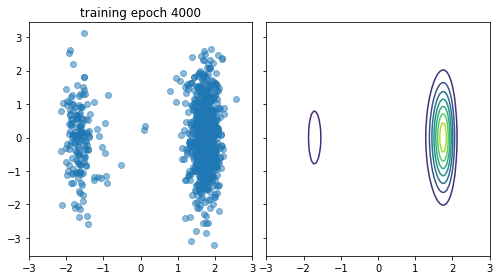

loss: -10.298620147684456, mean log p_x 8.516087884506625:  20%|██        | 4002/20000 [07:19<53:02,  5.03it/s]  

ESS is 0.8678396663337471


loss: -10.285510810211804, mean log p_x 8.508153270666103:  21%|██        | 4190/20000 [07:39<24:56, 10.57it/s]

Nan/Inf loss encountered


loss: nan, mean log p_x nan:  21%|██        | 4201/20000 [07:41<46:06,  5.71it/s]                              

Nan/Inf loss encountered


loss: -10.323308226639629, mean log p_x 8.520612033125483:  23%|██▎       | 4676/20000 [08:31<28:40,  8.91it/s]

Nan/Inf loss encountered


loss: -10.300760815840157, mean log p_x 8.498654092917663:  25%|██▍       | 4989/20000 [09:03<28:16,  8.85it/s]

Nan/Inf loss encountered


loss: -10.283046676886839, mean log p_x 8.519829271423227:  25%|██▌       | 5095/20000 [09:15<23:25, 10.60it/s]

Nan/Inf loss encountered


loss: -10.287872349821768, mean log p_x 8.623875316372516:  26%|██▋       | 5295/20000 [09:35<23:20, 10.50it/s]

Nan/Inf loss encountered


loss: -10.285015216326546, mean log p_x 8.471103420275139:  28%|██▊       | 5654/20000 [10:15<26:37,  8.98it/s]

Nan/Inf loss encountered


loss: -10.289343369321927, mean log p_x 8.536180732645878:  29%|██▉       | 5785/20000 [10:29<22:48, 10.39it/s]

Nan/Inf loss encountered


loss: -10.278949621349927, mean log p_x 8.49005550408683:  30%|███       | 6000/20000 [10:52<24:05,  9.68it/s] 

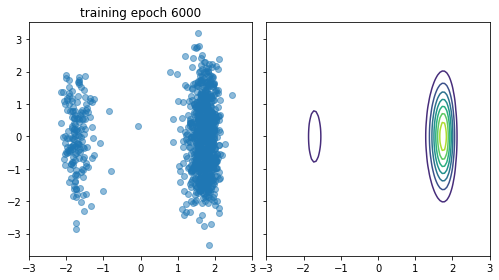

loss: -10.278949621349927, mean log p_x 8.49005550408683:  30%|███       | 6002/20000 [10:53<40:52,  5.71it/s]

ESS is 0.9071736897386216


loss: -10.285823564295947, mean log p_x 8.525968201113356:  31%|███       | 6105/20000 [11:03<24:21,  9.51it/s]

In [ ]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()


# KL

In [ ]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 1e-3
optimizer = "Adam"
loss_type = "kl"
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")


